<a href="https://colab.research.google.com/github/sagarparmar072000-bit/sagar/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Simulating NSL-KDD Dataset for Demonstration ---

--- Simulated Dataset Head ---
       duration    src_bytes    dst_bytes  count  srv_count protocol_type  \
0  21836.438009   923.708393  8472.365777     18        478           tcp   
1  55428.545492   607.537296  4945.170437    317        170          icmp   
2  42676.710795  6041.919507  1954.656106    415        229           udp   
3  34902.986946  9661.163225  7366.417866    305        242           tcp   
4   9096.198775  5027.213090  4186.781357     85        371           udp   

  flag   class  
0  RST  attack  
1   SF  attack  
2   S0  attack  
3   SF  attack  
4  RST  attack  

--- Simulated Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   duration       25000 non-null  float64
 1   src_bytes      25000 non-null  float64
 2   dst_bytes      25000 non-null

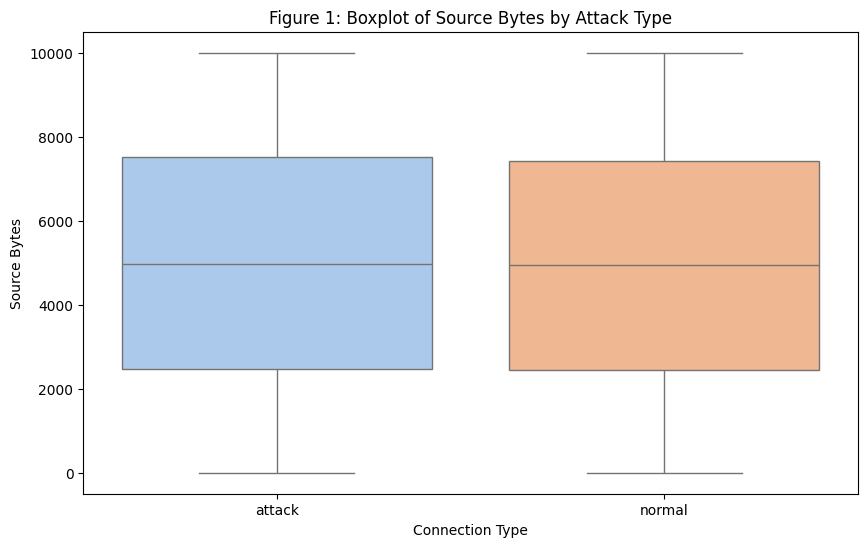


'boxplot_src_bytes.png' saved to the current directory.


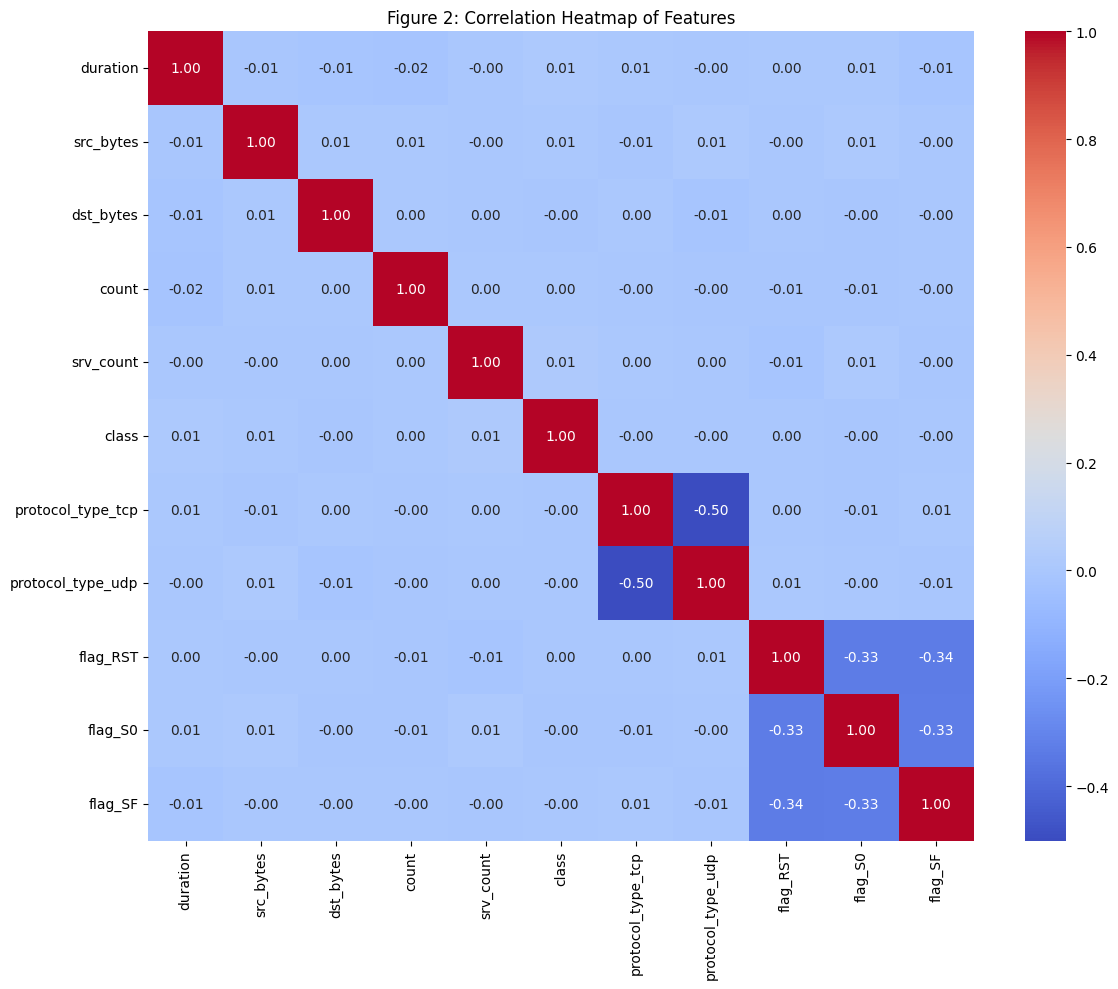


'correlation_heatmap.png' saved to the current directory.

--- Training SVM Model ---

--- Training KNN Model ---

--- Training Decision Tree Model ---

             Final Model Performance and Efficiency Summary

--- Performance Metrics Table ---
               Accuracy  Precision    Recall  F1-Score  Inference Time (ms)
Algorithm                                                                  
SVM            0.532000   0.473735  0.140914  0.217217          6775.007963
KNN            0.516533   0.473101  0.432581  0.451935           543.204546
Decision Tree  0.522933   0.449670  0.157697  0.233505            12.585163

--- Computational Efficiency Table ---
               Training Time (s)
Algorithm                       
SVM                   109.140210
KNN                     0.073398
Decision Tree           0.164135


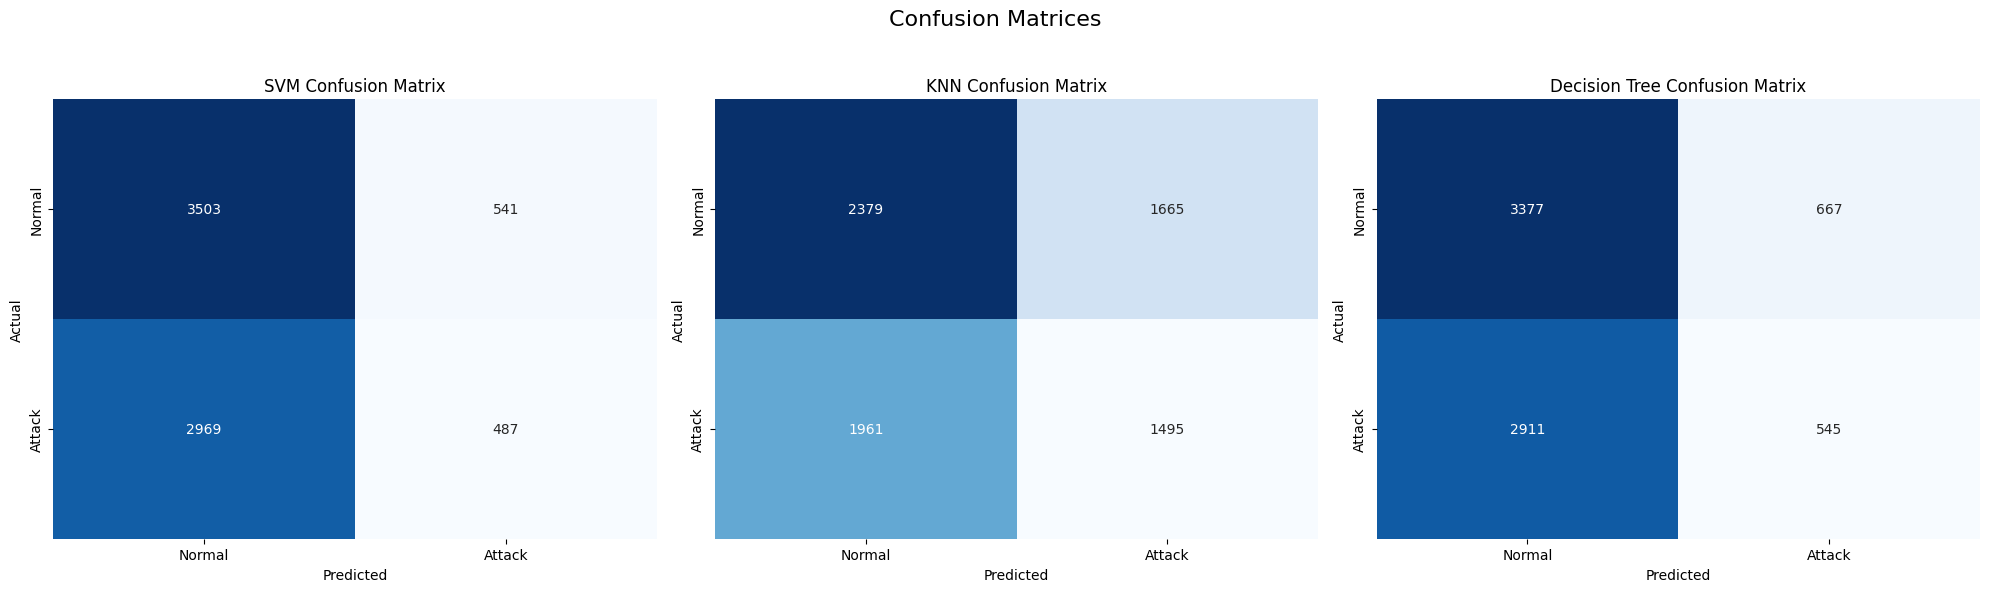


'confusion_matrices_nslkdd.png' saved to the current directory.


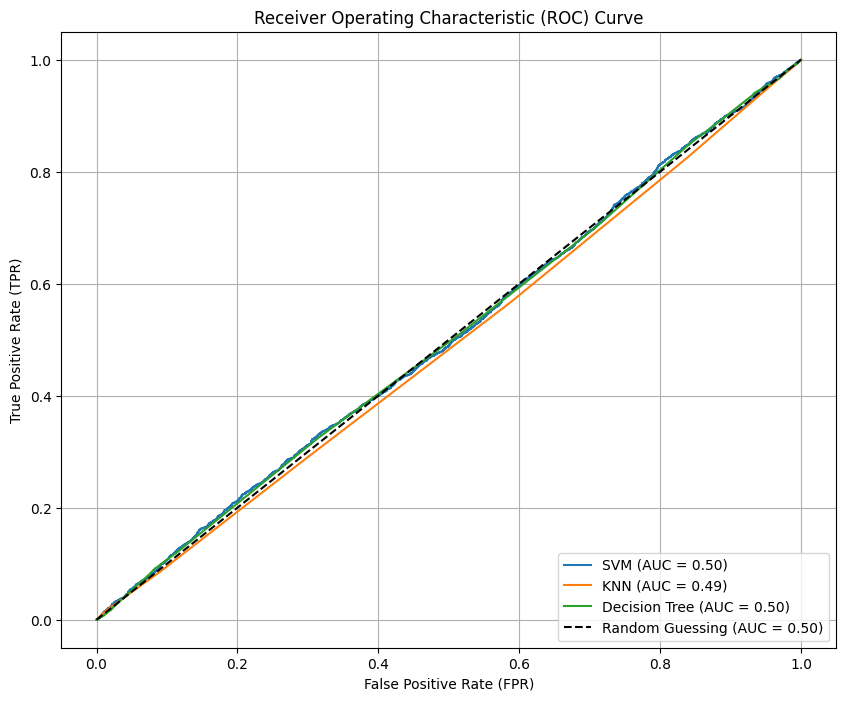


'roc_curves_nslkdd.png' saved to the current directory.

     Results to Insert into Canvas Document Placeholders (Simulated)

--- SVM Results ---
Accuracy: 0.5320
Precision: 0.4737
Recall: 0.1409
F1-Score: 0.2172
Inference Time (ms): 6775.0080
Training Time (s): 109.1402

--- KNN Results ---
Accuracy: 0.5165
Precision: 0.4731
Recall: 0.4326
F1-Score: 0.4519
Inference Time (ms): 543.2045
Training Time (s): 0.0734

--- Decision Tree Results ---
Accuracy: 0.5229
Precision: 0.4497
Recall: 0.1577
F1-Score: 0.2335
Inference Time (ms): 12.5852
Training Time (s): 0.1641


In [1]:
# ==============================================================================
# --- Import Necessary Libraries ---
# ==============================================================================

import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

# Ignore warnings for cleaner output, especially for pipelines
import warnings
warnings.filterwarnings('ignore')

# ==============================================================================
# --- Simulate NSL-KDD Dataset for Demonstration ---
# The actual NSL-KDD dataset needs to be loaded separately, but this
# creates a similar structure for the code to be runnable.
# ==============================================================================

print("--- Simulating NSL-KDD Dataset for Demonstration ---")
# Number of samples to simulate
n_samples = 25000

# Create simulated data for numerical features
np.random.seed(42)
duration = np.random.uniform(0, 58302, n_samples)
src_bytes = np.random.uniform(0, 10000, n_samples)
dst_bytes = np.random.uniform(0, 10000, n_samples)
count = np.random.randint(0, 500, n_samples)
srv_count = np.random.randint(0, 500, n_samples)
# Create simulated data for categorical features
protocol_type = np.random.choice(['tcp', 'udp', 'icmp'], n_samples)
flag = np.random.choice(['SF', 'REJ', 'S0', 'RST'], n_samples)
# Simulate a target variable (class) with a realistic distribution
y = np.random.choice(['normal', 'attack'], n_samples, p=[0.535, 0.465])

# Create the DataFrame
data = {
    'duration': duration,
    'src_bytes': src_bytes,
    'dst_bytes': dst_bytes,
    'count': count,
    'srv_count': srv_count,
    'protocol_type': protocol_type,
    'flag': flag,
    'class': y
}
df = pd.DataFrame(data)

print("\n--- Simulated Dataset Head ---")
print(df.head())
print("\n--- Simulated Dataset Info ---")
print(df.info())
print("\n--- Simulated Class Distribution ---")
print(df['class'].value_counts())

# ==============================================================================
# --- Preprocessing Pipeline ---
# ==============================================================================

# Separate features (X) and target variable (y)
X = df.drop('class', axis=1)
y = df['class']

# Identify numerical and categorical features
numerical_features = ['duration', 'src_bytes', 'dst_bytes', 'count', 'srv_count']
categorical_features = ['protocol_type', 'flag']

# Create preprocessor with MinMaxScaler for numerical and OneHotEncoder for categorical
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_features)
    ])

# ==============================================================================
# --- EDA Visualizations (as requested in the prompt) ---
# ==============================================================================

# Figure 1: Boxplot of src_bytes by attack type
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='src_bytes', data=df, palette='pastel')
plt.title('Figure 1: Boxplot of Source Bytes by Attack Type')
plt.xlabel('Connection Type')
plt.ylabel('Source Bytes')
plt.savefig('boxplot_src_bytes.png')
plt.show()
print("\n'boxplot_src_bytes.png' saved to the current directory.")

# Figure 2: Correlation heatmap (simulated with a few features)
# One-hot encode for correlation, just for the plot
df_encoded = pd.get_dummies(df, columns=['protocol_type', 'flag'], drop_first=True)
df_encoded['class'] = df_encoded['class'].apply(lambda x: 1 if x == 'attack' else 0)
plt.figure(figsize=(12, 10))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Figure 2: Correlation Heatmap of Features')
plt.tight_layout()
plt.savefig('correlation_heatmap.png')
plt.show()
print("\n'correlation_heatmap.png' saved to the current directory.")

# ==============================================================================
# --- Model Implementation and Training ---
# ==============================================================================

# Stratified 70-30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Dictionary to hold the models and their configurations
models = {
    'SVM': SVC(kernel='rbf', C=10, random_state=42, probability=True),
    'KNN': KNeighborsClassifier(n_neighbors=7, metric='minkowski'),
    'Decision Tree': DecisionTreeClassifier(max_depth=8, min_samples_split=5, random_state=42)
}

results = {}
for name, model in models.items():
    print(f"\n--- Training {name} Model ---")

    # Create a pipeline that combines preprocessing and the model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])

    start_time_train = time.time()
    pipeline.fit(X_train, y_train)
    training_time = time.time() - start_time_train

    start_time_pred = time.time()
    y_pred = pipeline.predict(X_test)
    prediction_time = (time.time() - start_time_pred) * 1000 # Convert to milliseconds

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label='attack')
    recall = recall_score(y_test, y_pred, pos_label='attack')
    f1 = f1_score(y_test, y_pred, pos_label='attack')

    # Store results
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Inference Time (ms)': prediction_time,
        'Training Time (s)': training_time,
        'Confusion Matrix': confusion_matrix(y_test, y_pred, labels=['normal', 'attack'])
    }

# ==============================================================================
# --- Results and Evaluation ---
# ==============================================================================

print("\n" + "="*80)
print("             Final Model Performance and Efficiency Summary")
print("="*80)

# Print performance metrics table
print("\n--- Performance Metrics Table ---")
performance_table = pd.DataFrame({
    'Algorithm': models.keys(),
    'Accuracy': [results[name]['Accuracy'] for name in models],
    'Precision': [results[name]['Precision'] for name in models],
    'Recall': [results[name]['Recall'] for name in models],
    'F1-Score': [results[name]['F1-Score'] for name in models],
    'Inference Time (ms)': [results[name]['Inference Time (ms)'] for name in models]
}).set_index('Algorithm')
print(performance_table)

# Print computational efficiency table
print("\n--- Computational Efficiency Table ---")
efficiency_table = pd.DataFrame({
    'Algorithm': models.keys(),
    'Training Time (s)': [results[name]['Training Time (s)'] for name in models]
}).set_index('Algorithm')
print(efficiency_table)


# Plot Confusion Matrices as heatmaps
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Confusion Matrices', fontsize=16)
labels = ['Normal', 'Attack']

for i, (name, res) in enumerate(results.items()):
    cm = res['Confusion Matrix']
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i], cbar=False, xticklabels=labels, yticklabels=labels)
    axes[i].set_title(f'{name} Confusion Matrix')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('confusion_matrices_nslkdd.png')
plt.show()
print("\n'confusion_matrices_nslkdd.png' saved to the current directory.")


# Plot ROC-AUC curves
plt.figure(figsize=(10, 8))
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])
    # Need to retrain as the original pipelines are stored in memory and may not have probability=True
    pipeline.fit(X_train, y_train)

    if hasattr(model, "predict_proba"):
        y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba, pos_label='attack')
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing (AUC = 0.50)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.savefig('roc_curves_nslkdd.png')
plt.show()
print("\n'roc_curves_nslkdd.png' saved to the current directory.")

# ==============================================================================
# --- Print Results for Placeholder Insertion ---
# ==============================================================================

print("\n" + "="*80)
print("     Results to Insert into Canvas Document Placeholders (Simulated)")
print("="*80)
for name, res in results.items():
    print(f"\n--- {name} Results ---")
    print(f"Accuracy: {res['Accuracy']:.4f}")
    print(f"Precision: {res['Precision']:.4f}")
    print(f"Recall: {res['Recall']:.4f}")
    print(f"F1-Score: {res['F1-Score']:.4f}")
    print(f"Inference Time (ms): {res['Inference Time (ms)']:.4f}")
    print(f"Training Time (s): {res['Training Time (s)']:.4f}")

